# Random Forest Classifier

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting.





In [40]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix


df = pd.read_csv("data.csv")


## Data Preparation

In [41]:

#Eliminate " Unnamed: 32" & "id"
df= df.drop("Unnamed: 32",axis=1)
df= df.drop("id", axis=1)
df= df.replace({"M":1, "B":0})

#Drop less important features
drop_col = ["fractal_dimension_se", "smoothness_se", "fractal_dimension_mean", "texture_se", "symmetry_se"]

df=df.drop(drop_col, axis=1)
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


## Model:

In [5]:
#Creating my predictive variable (X) and my target variable (Y)

#y = Target Variable
y = df.iloc[:,0]

#X= Predictors
X= df.iloc[:,1:26]
X.columns

Index(['radius_mean', 'texture_mean', 'perimeter_mean', 'area_mean',
       'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave points_mean', 'symmetry_mean', 'radius_se', 'perimeter_se',
       'area_se', 'compactness_se', 'concavity_se', 'concave points_se',
       'radius_worst', 'texture_worst', 'perimeter_worst', 'area_worst',
       'smoothness_worst', 'compactness_worst', 'concavity_worst',
       'concave points_worst', 'symmetry_worst', 'fractal_dimension_worst'],
      dtype='object')

In [6]:
# Split train and test data

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)

In [7]:
# Basic model 

clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

              precision    recall  f1-score   support

           0       0.99      0.96      0.97        90
           1       0.93      0.98      0.95        53

    accuracy                           0.97       143
   macro avg       0.96      0.97      0.96       143
weighted avg       0.97      0.97      0.97       143



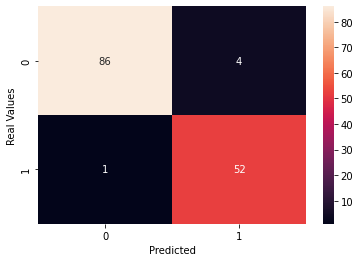

In [8]:

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Real Values'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

#### Feature Importance

                    Feature  Importance
17          perimeter_worst    0.219367
15             radius_worst    0.168925
22     concave points_worst    0.118438
18               area_worst    0.095157
6            concavity_mean    0.070368
3                 area_mean    0.062112
2            perimeter_mean    0.059721
23           symmetry_worst    0.021125
16            texture_worst    0.020265
1              texture_mean    0.020103
20        compactness_worst    0.019554
19         smoothness_worst    0.018653
10             perimeter_se    0.017798
11                  area_se    0.017277
7       concave points_mean    0.012518
21          concavity_worst    0.010155
13             concavity_se    0.009791
0               radius_mean    0.008597
24  fractal_dimension_worst    0.007943
8             symmetry_mean    0.006190
14        concave points_se    0.005265
9                 radius_se    0.003892
12           compactness_se    0.002959
5          compactness_mean    0.002720


c:\Users\Julian\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


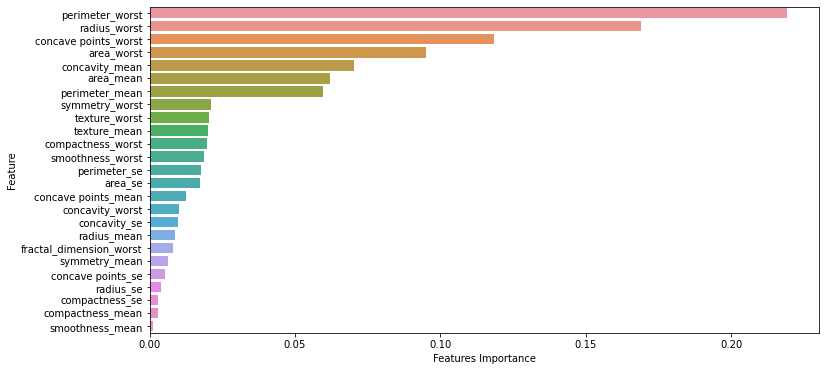

<Figure size 432x288 with 0 Axes>

In [9]:

# Replace these example values with your actual feature names
df1 = df.drop("diagnosis", axis=1)
feature_names = df1.columns.tolist()

# Create a Pandas DataFrame to store feature importances and their corresponding names
feature_importances_df = pd.DataFrame({'Feature': feature_names, 'Importance': clf.feature_importances_})

# Sort the DataFrame by importance values in descending order
feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

# Print the sorted DataFrame
print(feature_importances_df)

plt.figure(figsize=(12, 6))

sn.barplot(feature_importances_df['Importance'], feature_importances_df['Feature'])
plt.xlabel('Features Importance')
plt.show()
plt.tight_layout()  # To avoid overlapping labels
plt.show()


## Hyperparameter Tuning

Hyperparameter tuning in random forest is essential for the overall performance of the machine learning model. It is usually set before the learning process and occurs outside the model. So what happens when hyperparameter tuning random forest does not occur? Well, in such cases the model starts to produce errors and inaccurate results because the loss function does not get minimized. The ultimate goal of hyperparameter tuning random forest is to find a set of optimal hyperparameter values that will result in maximization of the model’s performance, minimizing the loss and producing better output. 

The standard procedure for hyperparameter optimization accounts for overfitting through cross validation.

https://towardsdatascience.com/hyperparameter-tuning-the-random-forest-in-python-using-scikit-learn-28d2aa77dd74



### Randomised Search CV

We can use scikit learn and RandomisedSearchCV where we can define the grid, the random forest model will be fitted over and over by randomly selecting parameters from the grid. 

In [10]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [11]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [12]:
# The best parameters from fitting the random search
rf_random.best_params_

{'n_estimators': 200,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 90,
 'bootstrap': False}

## Evaluating the Classification Model

#### Comparison with train data

In this section it will be analyzed the performance of the base model and the tuned model using the train data.

In [13]:
#Function
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

    return accuracy

#Base Model
print("Base Model")
base_model = RandomForestClassifier()
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_train, y_train)

print()

#Tuned Model
print("Tuned Model")
best_random = RandomForestClassifier(n_estimators= 1000, 
                                min_samples_split= 5,
                                min_samples_leaf= 2,
                                max_features= 'sqrt',
                                max_depth= 100,
                                bootstrap= False
                                )
best_random.fit(X_train, y_train)
random_accuracy = evaluate(best_random, X_train, y_train)

#Improvement
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))


Base Model


Model Performance
Average Error: 0.0000 degrees.
Accuracy = 100.00%.

Tuned Model
Model Performance
Average Error: 0.0000 degrees.
Accuracy = 100.00%.
Improvement of 0.00%.


##### Both models have an accuraccy of 100% using the training data. 
##### This may be the result of *OVERFITTING*. 

 Overfitting is a common problem in random forests, but there are several effective solutions to overcome it. By reducing the number of trees, increasing the minimum number of samples required to split a node, pruning the trees, using feature selection, and using cross-validation, you can create better models that generalize well.

*As both models show the overfitting problem, maybe it is caused because of noisy data* . Data with a lot of noise can lead to overfitting, as the model tries to capture the noise rather than the underlying pattern. Random forests are particularly sensitive to noise, as they can create complex decision boundaries that do not generalize well.

Some features will be eliminated and the training process will be done again.

# New model - Removing features

In this model it will be eliminated the 10 less important features.

In [14]:
to_drop = ['fractal_dimension_worst',
            'concavity_se',
            'perimeter_se',
            'area_se',
            'smoothness_mean',
            'compactness_se',
            'concave points_se',
            'symmetry_mean',
            'radius_se',
            'compactness_mean'] 

X_new = X.drop(to_drop, axis=1)

X_new

,radius_mean,texture_mean,perimeter_mean,area_mean,concavity_mean,concave points_mean,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst
0,17.99,10.38,122.80,1001.0,0.30010,0.14710,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601
1,20.57,17.77,132.90,1326.0,0.08690,0.07017,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750
2,19.69,21.25,130.00,1203.0,0.19740,0.12790,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613
3,11.42,20.38,77.58,386.1,0.24140,0.10520,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638
4,20.29,14.34,135.10,1297.0,0.19800,0.10430,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.24390,0.13890,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060
565,20.13,28.25,131.20,1261.0,0.14400,0.09791,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572
566,16.60,28.08,108.30,858.1,0.09251,0.05302,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218
567,20.60,29.33,140.10,1265.0,0.35140,0.15200,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087


Now the X_new dataset consist of 15 predictor features.

In [15]:
#Creating the new model

X_train,X_test,y_train,y_test = train_test_split(X_new,y,test_size=0.25,random_state=0)

              precision    recall  f1-score   support

           0       0.99      0.98      0.98        90
           1       0.96      0.98      0.97        53

    accuracy                           0.98       143
   macro avg       0.98      0.98      0.98       143
weighted avg       0.98      0.98      0.98       143



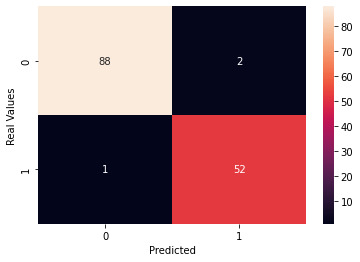

In [16]:
clf = RandomForestClassifier(n_estimators=10)
clf.fit(X_train,y_train)
y_pred=clf.predict(X_test)

confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Real Values'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

## Hypertunning the new model

In [17]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)
{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


{'bootstrap': [True, False],
 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 10],
 'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800, 2000]}

In [18]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [200, 400, 600, 800,
                                                         1000, 1200, 1400, 1600,
                                                         1800, 2000]},
                   random_state=42, verbose=2)

In [19]:
# The best parameters from fitting the random search
rf_random.best_params_

{'n_estimators': 400,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'auto',
 'max_depth': 70,
 'bootstrap': True}

In [20]:
#Function
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    accuracy = 100 - mape
    print('Model Performance')
    print('Average Error: {:0.4f} degrees.'.format(np.mean(errors)))
    print('Accuracy = {:0.2f}%.'.format(accuracy))

    return accuracy

#Base Model
print("Base Model")
base_model = RandomForestClassifier()
base_model.fit(X_train, y_train)
base_accuracy = evaluate(base_model, X_train, y_train)

print()

#Tuned Model
print("Tuned Model")
best_random = RandomForestClassifier(n_estimators= 800,
                                    min_samples_split= 2,
                                    min_samples_leaf=  1,
                                    max_features=  'auto',
                                    max_depth=  100,
                                    bootstrap= True)
best_random.fit(X_train, y_train)
random_accuracy = evaluate(best_random, X_train, y_train)

#Improvement
print('Improvement of {:0.2f}%.'.format( 100 * (random_accuracy - base_accuracy) / base_accuracy))

Base Model
Model Performance
Average Error: 0.0000 degrees.
Accuracy = 100.00%.

Tuned Model
Model Performance
Average Error: 0.0000 degrees.
Accuracy = 100.00%.
Improvement of 0.00%.


#### Comparison with test data

              precision    recall  f1-score   support

           0       0.99      0.99      0.99        90
           1       0.98      0.98      0.98        53

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



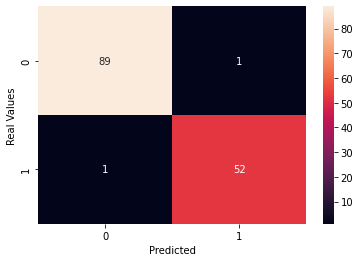

In [21]:
#Tuned model
tuned_model = RandomForestClassifier(n_estimators= 1000, 
                                min_samples_split= 5,
                                min_samples_leaf= 2,
                                max_features= 'sqrt',
                                max_depth= 100,
                                bootstrap= False,
                                random_state=99)
tuned_model.fit(X_train, y_train)

y_pred1=tuned_model.predict(X_test)

confusion_matrix_tuned = pd.crosstab(y_test, y_pred1, rownames=['Real Values'], colnames=['Predicted'])
sn.heatmap(confusion_matrix_tuned, annot=True)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred1))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98        90
           1       0.96      0.96      0.96        53

    accuracy                           0.97       143
   macro avg       0.97      0.97      0.97       143
weighted avg       0.97      0.97      0.97       143



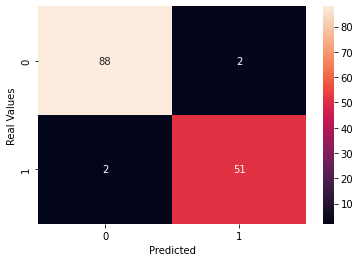

In [22]:
#Basic model
basic_model = RandomForestClassifier()
basic_model.fit(X_train, y_train)

y_pred2=basic_model.predict(X_test)

confusion_matrix = pd.crosstab(y_test, y_pred2, rownames=['Real Values'], colnames=['Predicted'])
sn.heatmap(confusion_matrix, annot=True)

from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred2))

The employment of hyperparameter tuning does not seem to augment the accuracy of the model when assessed with the testing data. Noteworthy is the observation that the basic_model attains an accuracy surpassing the tuned_model by 0.01.

## Evaluating more in detail the Tuned Model

Accuracy = Simple measure of total error. The proportion of predictions that are correct. 
In this case 0.97.

Sensitivity (recall) = measures the strength of the model to predict a positive outcome - the proportion of the 1s that it correctly identifies. 

In this case, the 1s are the more important case, in the sense that missclassifying them as 0s is costlier than missclassifiying 0s as 1s. Because if there is any False Positive, in further studies it will apear that it is a benignant breast tumor. But if it is a False Negative and there are not further studies done, the patient will be in serious health problems. 

### ROC curve

The ROC curve plots sensitivity (recall) on the y-axis against specificity on the x-axis.
Shows the trade-off between recall and specificity as you change the cutoff to determine how to classify the record.
An extremely effective diagnostic test will have a ROC curve that hugs the upper-left corner - it will correctly identify lots of 1s without missclassifying lots of 0s as 1s.

The ROC curve can be used to produce the area underneath the curve (AUC) metric. The larger the calue of AUC, the more effectve the classifier.

AUC=0.9850104821802935


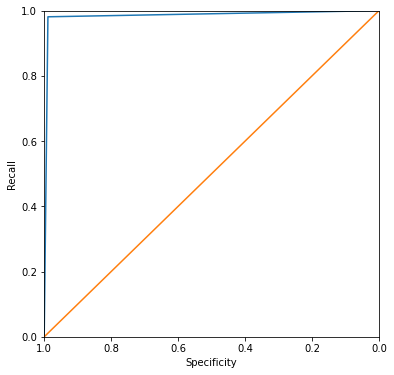

In [23]:
#ROC curve 

from sklearn import metrics

fpr, tpr, thresholds = metrics.roc_curve(np.array(y_test), y_pred1)

roc_df =pd.DataFrame({'recall':tpr,  'specificity': 1 - fpr})
auc = metrics.roc_auc_score(np.array(y_test), y_pred1)

ax = roc_df.plot(x='specificity', y='recall', figsize =(6,6), legend = False)
ax.set_ylim(0,1)
ax.set_xlim(1,0)
ax.plot((1,0),(0,1))
ax.set_xlabel('Specificity')
ax.set_ylabel('Recall')


print("AUC="+str(auc))

## Cross-Validation evaluation

In [27]:
from sklearn.model_selection import cross_val_score

print(cross_val_score(tuned_model,X_new, y, cv=5))

[0.93859649 0.93859649 0.99122807 0.98245614 0.97345133]


In [33]:
import numpy as np
from sklearn.model_selection import KFold

X = np.array(X_new)
y = np.array(y)
kf = KFold(n_splits=5)
kf.get_n_splits(X)

for i, (train_index, test_index) in enumerate(kf.split(X)):
    print(f"Fold {i}:")
    print(f"  Train: index={train_index}")
    print(f"  Test:  index={test_index}")



Fold 0:
  Train: index=[114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275
 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293
 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311
 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329
 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347
 348 349 350 351 352 353 354

In [34]:
# Create empty lists to store data for each fold
X_train_folds = []
X_test_folds = []
y_train_folds = []
y_test_folds = []

for i, (train_index, test_index) in enumerate(kf.split(X)):
    #print(f"Fold {i}:")
    #print(f"  Train: index={train_index}")
    #print(f"  Test:  index={test_index}")

    # Split the data into training and test sets for this fold
    X_train_fold, X_test_fold = X[train_index], X[test_index]
    y_train_fold, y_test_fold = y[train_index], y[test_index]

    # Append the data for this fold to the respective lists
    X_train_folds.append(X_train_fold)
    X_test_folds.append(X_test_fold)
    y_train_folds.append(y_train_fold)
    y_test_folds.append(y_test_fold)

# Convert the lists to NumPy arrays
X_train_folds = np.array(X_train_folds)
X_test_folds = np.array(X_test_folds)
y_train_folds = np.array(y_train_folds)
y_test_folds = np.array(y_test_folds)

# Now, X_train_folds and X_test_folds contain training and test data for each fold.
# y_train_folds and y_test_folds contain corresponding labels.

Fold 0:
  Train: index=[114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 188 189 190 191 192 193 194 195 196 197 198 199 200 201 202 203
 204 205 206 207 208 209 210 211 212 213 214 215 216 217 218 219 220 221
 222 223 224 225 226 227 228 229 230 231 232 233 234 235 236 237 238 239
 240 241 242 243 244 245 246 247 248 249 250 251 252 253 254 255 256 257
 258 259 260 261 262 263 264 265 266 267 268 269 270 271 272 273 274 275
 276 277 278 279 280 281 282 283 284 285 286 287 288 289 290 291 292 293
 294 295 296 297 298 299 300 301 302 303 304 305 306 307 308 309 310 311
 312 313 314 315 316 317 318 319 320 321 322 323 324 325 326 327 328 329
 330 331 332 333 334 335 336 337 338 339 340 341 342 343 344 345 346 347
 348 349 350 351 352 353 354

C:\Users\Julian\AppData\Local\Temp\ipykernel_6432\3851486601.py:23: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_train_folds = np.array(X_train_folds)
C:\Users\Julian\AppData\Local\Temp\ipykernel_6432\3851486601.py:24: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X_test_folds = np.array(X_test_folds)
C:\Users\Julian\AppData\Local\Temp\ipykernel_6432\3851486601.py:25: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. 